In [295]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd

In [296]:
!pwd
!ls

/home/krista/Documents/testing_learning_rates
check_simulated_learning_rate_effects.ipynb
conf_lr_.01_acc
probC_sim_learning_signals_lr_.1.csv
probC_sim_learning_signals_lr_1.csv
probC_sim_learning_signals_lr_.2.csv
probC_sim_learning_signals_lr_.3.csv
probC_sim_learning_signals_lr_.4.csv
probC_sim_learning_signals_lr_.5.csv
probC_sim_learning_signals_lr_.6.csv
probC_sim_learning_signals_lr_.7.csv
probC_sim_learning_signals_lr_.8.csv
probC_sim_learning_signals_lr_.9.csv
vol_lr_.01_acc


In [297]:
#get all of the dfs
lr_0pt1 = pd.read_csv('probC_sim_learning_signals_lr_.1.csv')
lr_0pt2 = pd.read_csv('probC_sim_learning_signals_lr_.2.csv')
lr_0pt3 = pd.read_csv('probC_sim_learning_signals_lr_.3.csv')
lr_0pt4 = pd.read_csv('probC_sim_learning_signals_lr_.4.csv')
lr_0pt5 = pd.read_csv('probC_sim_learning_signals_lr_.5.csv')
lr_0pt6 = pd.read_csv('probC_sim_learning_signals_lr_.6.csv')
lr_0pt7 = pd.read_csv('probC_sim_learning_signals_lr_.7.csv')
lr_0pt8 = pd.read_csv('probC_sim_learning_signals_lr_.8.csv')
lr_0pt9 = pd.read_csv('probC_sim_learning_signals_lr_.9.csv')
lr_1 = pd.read_csv('probC_sim_learning_signals_lr_1.csv')

In [263]:
#should have done this earlier
lr_0pt1['lr'] = 0.1
lr_0pt2['lr'] = 0.2
lr_0pt3['lr'] = 0.3
lr_0pt4['lr'] = 0.4
lr_0pt5['lr'] = 0.5
lr_0pt6['lr'] = 0.6
lr_0pt7['lr'] = 0.7
lr_0pt8['lr'] = 0.8
lr_0pt9['lr'] = 0.9
lr_1['lr'] = 1

In [264]:
#combine all of the dataframes for easy analysis 
full_df = pd.concat((lr_0pt1, lr_0pt2, lr_0pt3, lr_0pt4, lr_0pt5, lr_0pt6, 
                    lr_0pt7, lr_0pt8, lr_0pt9, lr_1), ignore_index=True)

In [300]:
full_df=full_df.rename(columns=lambda x: x.strip())

In [266]:
#label experiments
full_df['experiment'] = np.nan
full_df.loc[(full_df.cond == 'lc') | (full_df.cond == 'hc'),'experiment'] = 'conflict'
full_df.loc[(full_df.cond == 'lv') | (full_df.cond == 'hv'),'experiment'] = 'volatility'

In [267]:
#for averaging, make drift-rate for a correct trial positive
full_df['flipped_gen_drift'] = full_df['gen_drift']
full_df.loc[(full_df.acc == 1),'flipped_gen_drift'] = np.abs(full_df.loc[(full_df.acc == 1),'gen_drift'])

In [268]:
full_df.head(), full_df.tail()

(        cpp  target_B  choice_B  cp  gen_drift  gen_bound   rt    acc  \
 0  0.025334  0.000000  0.000000   0   0.011457   0.281703  0.7  False   
 1  0.022106  0.000000  0.000000   0   0.011457   0.502533  0.7  False   
 2  0.020935  0.038001 -0.038001   0   0.011457   0.502211  0.7  False   
 3  0.020345  0.070320 -0.070320   0   0.015257   0.502094  0.7  False   
 4  0.646769  0.100251 -0.100251   0   0.022289   0.502034  0.7  False   
 
    subj_idx   ID        ...        id_choices  correct_id_choices  b_t0  \
 0         0  761        ...                 0                   1   0.0   
 1         0  761        ...                 0                   1   0.0   
 2         0  761        ...                 0                   1   0.0   
 3         0  761        ...                 0                   1   0.0   
 4         0  761        ...                 0                   1   0.0   
 
        b_t1      r_t1      r_t2  obs_cp   lr  experiment flipped_gen_drift  
 0  0.000000  0.00

In [269]:
#create an array of the beliefs for the two targets
B_targets = full_df[['b_t0','b_t1']].values
#for each trial, get col 0 if 0 is correct, 1 if 1 is correct
np.shape(B_targets)

(576000, 2)

In [270]:
#get the belief for the ideal target
B_ideal_target = np.asarray([B_targets[t, full_df.correct_id_choices[t]] for t in range(0,len(full_df))])
B_nonideal_target = np.asarray([B_targets[t, (1-full_df.correct_id_choices[t])] for t in range(0,len(full_df))])

full_df['ideal_B'] = B_ideal_target - B_nonideal_target
full_df['B_ideal_target'] = B_ideal_target
full_df['B_nonideal_target'] = B_nonideal_target

In [271]:
full_df.groupby(['lr', 'cond']).mean()

cpp  target_B  choice_B        cp  gen_drift  gen_bound  \
lr  cond                                                                 
0.1 hc    0.111914 -0.022613  0.129711  0.039444  -0.139447   0.511083   
    hv    0.142467 -0.025382  0.111582  0.063958  -0.091672   0.514135   
    lc    0.087640  0.002491  0.290602  0.039444   0.019707   0.508647   
    lv    0.082787 -0.010746  0.277581  0.028542  -0.055436   0.508175   
0.2 hc    0.109146 -0.005918  0.255151  0.039444  -0.047211   0.521709   
    hv    0.141760  0.011262  0.250228  0.063958  -0.021326   0.528224   
    lc    0.087114  0.024657  0.611431  0.039444   0.040840   0.517282   
    lv    0.079612  0.002089  0.523403  0.028542  -0.029591   0.515802   
0.3 hc    0.108929  0.007900  0.353557  0.039444  -0.014612   0.532558   
    hv    0.139490  0.008482  0.335085  0.063958  -0.004647   0.541702   
    lc    0.088838  0.031780  0.777169  0.039444   0.039891   0.526489   
    lv    0.080082  0.028747  0.633285  0.028542  -0.011044   0.523901   
0.4 hc    0.108407  0.004184  0.396136  0.039444  -0.001159   0.543230   
    hv    0.141764  0.017494  0.408381  0.063958   0.008517   0.556527   
    lc    0.088163  0.046188  0.864269  0.039444   0.034014   0.535075   
    lv    0.080117  0.018037  0.686031  0.028542  -0.006195   0.531920   
0.5 hc    0.107269  0.023014  0.436666  0.039444   0.027626   0.553487   
    hv    0.140248  0.030966  0.468531  0.063958   0.016944   0.569909   
    lc    0.088592  0.057459  0.913908  0.039444   0.033581   0.544092   
    lv    0.079324  0.026636  0.718721  0.028542   0.003114   0.539530   
0.6 hc    0.106674  0.022560  0.453390  0.039444   0.020533   0.563833   
    hv    0.140478  0.034517  0.503271  0.063958   0.023553   0.584066   
    lc    0.088660  0.074467  0.947286  0.039444   0.037547   0.553011   
    lv    0.079442  0.029798  0.734391  0.028542   0.001151   0.547522   
0.7 hc    0.107569  0.029704  0.473844  0.039444   0.011093   0.575113   
    hv    0.140310  0.047701  0.534545  0.063958   0.035060   0.597974   
    lc    0.088539  0.097103  0.978766  0.039444   0.041493   0.561771   
    lv    0.079373  0.048371  0.742211  0.028542   0.016437   0.555409   
0.8 hc    0.106647  0.051651  0.478497  0.039444   0.036385   0.585123   
    hv    0.140339  0.055678  0.555499  0.063958   0.037727   0.612007   
    lc    0.088499  0.099538  0.992926  0.039444   0.045269   0.570567   
    lv    0.079014  0.072919  0.751823  0.028542   0.032787   0.563045   
0.9 hc    0.106847  0.057503  0.495578  0.039444   0.037031   0.595969   
    hv    0.140392  0.067953  0.575275  0.063958   0.049248   0.626068   
    lc    0.088606  0.115440  1.001083  0.039444   0.051311   0.579495   
    lv    0.079210  0.090039  0.770358  0.028542   0.039087   0.571114   
1.0 hc    0.106193  0.061408  0.511967  0.039444   0.044605   0.605969   
    hv    0.141027  0.065528  0.585809  0.063958   0.049282   0.640720   
    lc    0.088595  0.124801  1.022887  0.039444   0.053818   0.588313   
    lv    0.078973  0.090041  0.779439  0.028542   0.045440   0.578788   

                rt       acc  subj_idx     ID        ...          \
lr  cond                                             ...           
0.1 hc    0.432165  0.460694      11.5  772.5        ...           
    hv    0.440626  0.440972      11.5  772.5        ...           
    lc    0.417194  0.429097      11.5  772.5        ...           
    lv    0.405291  0.465208      11.5  772.5        ...           
0.2 hc    0.392603  0.493958      11.5  772.5        ...           
    hv    0.405216  0.448889      11.5  772.5        ...           
    lc    0.365653  0.549931      11.5  772.5        ...           
    lv    0.358946  0.585208      11.5  772.5        ...           
0.3 hc    0.379894  0.545069      11.5  772.5        ...           
    hv    0.393414  0.463889      11.5  772.5        ...           
    lc    0.342417  0.629444      11.5  772.5        ...           
    lv    0.343000  0.

Text(0.5,1,'Boundary vs. learning rate')

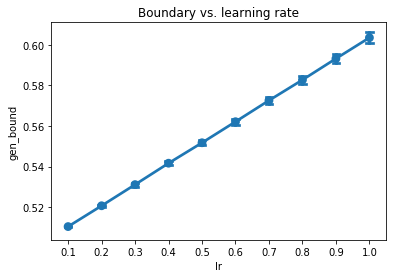

In [162]:
ax = sns.pointplot(x="lr", y="gen_bound", data=full_df, capsize=.2, units="ID")
plt.title('Boundary vs. learning rate')

Text(0.5,1,'Drift-rate vs. learning rate')

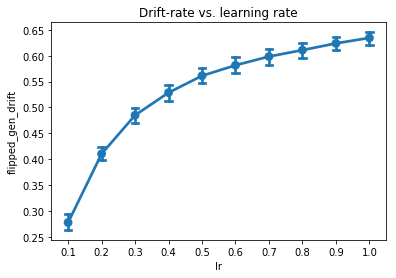

In [163]:
ax = sns.pointplot(x="lr", y="flipped_gen_drift", data=full_df, capsize=.2, units="ID")
plt.title('Drift-rate vs. learning rate')

Text(0.5,1,'Accuracy vs. learning rate')

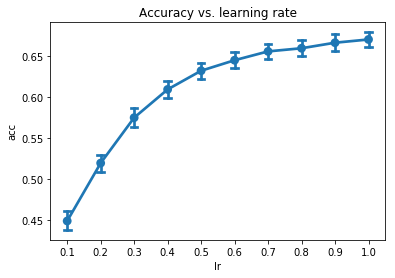

In [164]:
ax = sns.pointplot(x="lr", y="acc", data=full_df, capsize=.2, units="ID")
plt.title('Accuracy vs. learning rate')

Text(0.5,1,'RT vs. learning rate')

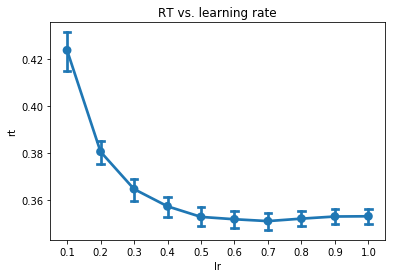

In [165]:
ax = sns.pointplot(x="lr", y="rt", data=full_df, capsize=.2, units="ID")
plt.title('RT vs. learning rate')

Text(0.5,1,'CPP vs. learning rate')

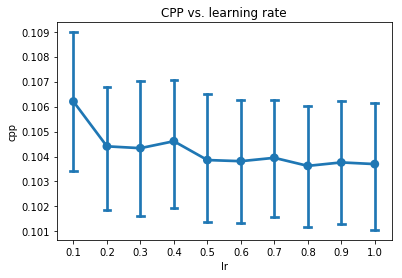

In [177]:
ax = sns.pointplot(x="lr", y="cpp", data=full_df, capsize=.2, units="ID")
plt.title('CPP vs. learning rate')

Text(0.5,1,'B vs. learning rate')

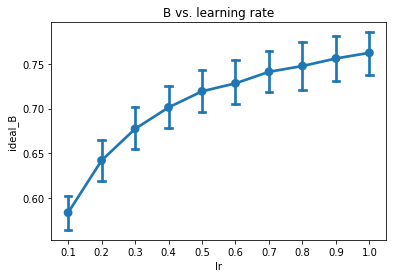

In [178]:
ax = sns.pointplot(x="lr", y="ideal_B", data=full_df, capsize=.2, units="ID")
plt.title('B vs. learning rate')

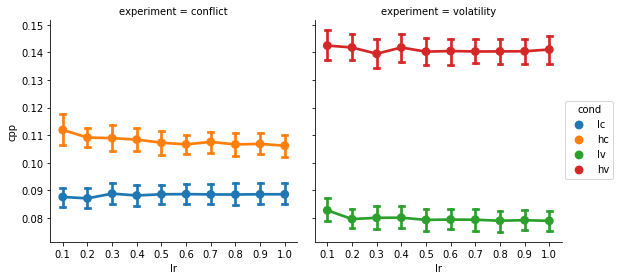

In [166]:
ax = sns.factorplot(x="lr", y="cpp", hue="cond", col="experiment", data=full_df, capsize=.2, units="ID")
# plt.title('CPP vs. learning rate')

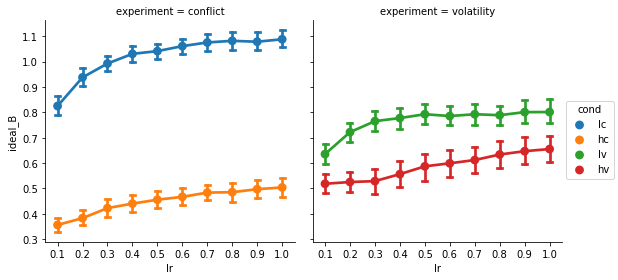

In [167]:
ax = sns.factorplot(x="lr", y="ideal_B", hue="cond", col="experiment", data=full_df, capsize=.2, units="ID")

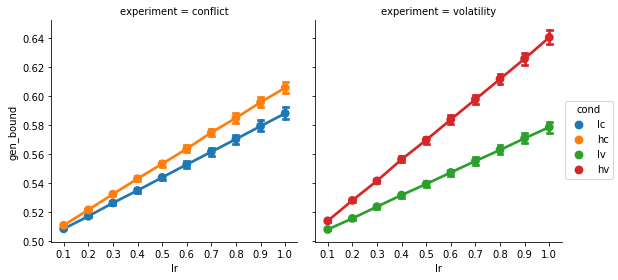

In [168]:
ax = sns.factorplot(x="lr", y="gen_bound", hue="cond", col="experiment", data=full_df, capsize=.2, units="ID")
ax.set_ylabels('boundary height')
ax.set_xlabels('learning rate')

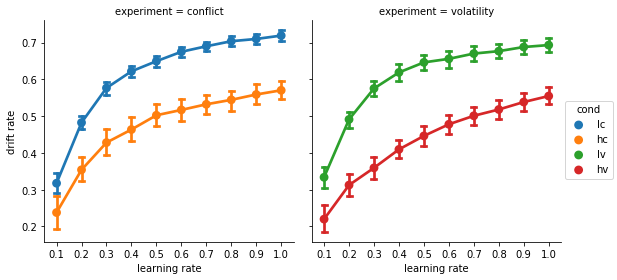

In [179]:
ax = sns.factorplot(x="lr", y="flipped_gen_drift", hue="cond", col="experiment", data=full_df, capsize=.2, units="ID")
ax.set_ylabels('drift-rate')
ax.set_xlabels('learning rate')

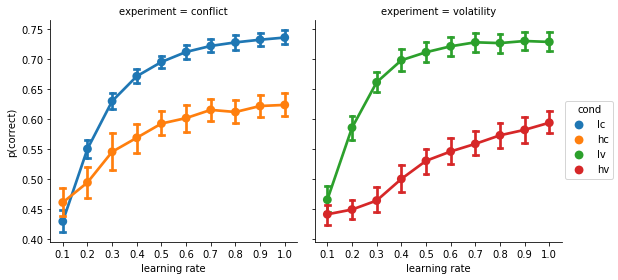

In [170]:
ax = sns.factorplot(x="lr", y="acc", hue="cond", col="experiment", data=full_df, capsize=.2, units="ID")
ax.set_ylabels('p(correct)')
ax.set_xlabels('learning rate')

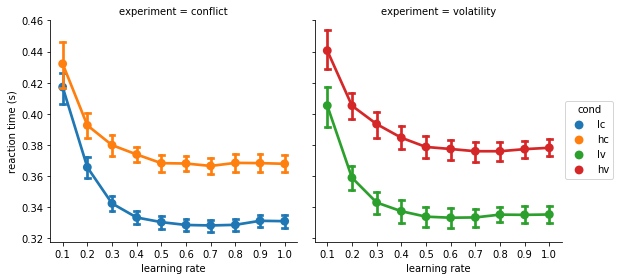

In [171]:
ax = sns.factorplot(x="lr", y="rt", hue="cond", col="experiment", data=full_df, capsize=.2, units="ID")
ax.set_ylabels('reaction time (s)')
ax.set_xlabels('learning rate')

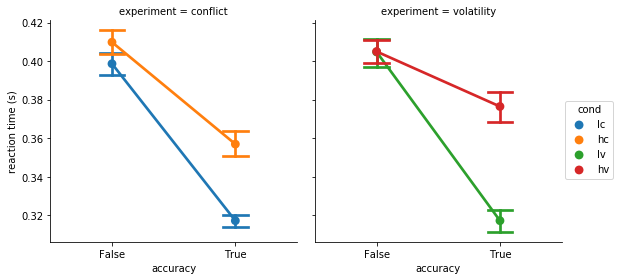

In [172]:
ax = sns.factorplot(x="acc", y="rt", hue="cond", col="experiment", data=full_df, capsize=.2, units="ID")
ax.set_ylabels('reaction time (s)')
ax.set_xlabels('accuracy')

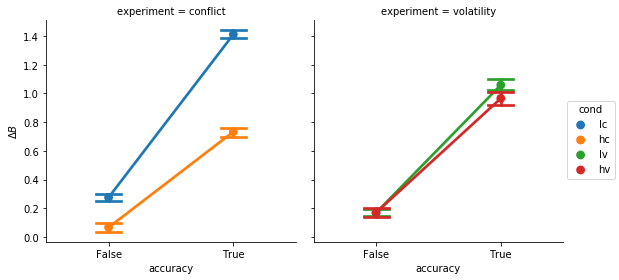

In [175]:
ax = sns.factorplot(x="acc", y="ideal_B", hue="cond", col="experiment", data=full_df, capsize=.2, units="ID")
ax.set_xlabels('accuracy')
ax.set_ylabels(r'$\Delta B$')

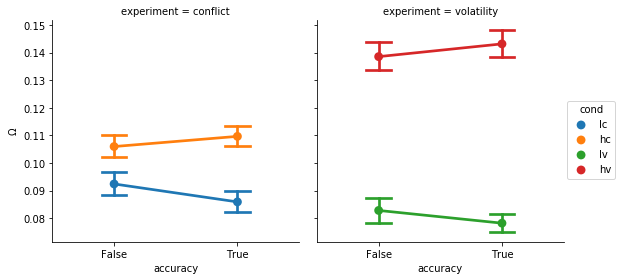

In [176]:
ax = sns.factorplot(x="acc", y="cpp", hue="cond", col="experiment", data=full_df, capsize=.2, units="ID")
ax.set_ylabels(r'$\Omega$')
ax.set_xlabels('accuracy')

In [272]:
full_df['trial'] = np.repeat(np.arange(0,600), 24*10*4)

In [273]:
full_df.loc[full_df.trial==600, 'cp'] = 1

In [274]:
#now look at the time series. 
epoch_trials = full_df.cp != 1
epoch_trial_list = epoch_trials.cumsum()-epoch_trials.cumsum().where(~epoch_trials).ffill().fillna(0).astype(int)
print(epoch_trial_list)
full_df['epoch_trials'] = epoch_trial_list

0          1
1          2
2          3
3          4
4          5
5          6
6          7
7          8
8          9
9         10
10        11
11        12
12        13
13        14
14        15
15        16
16        17
17        18
18        19
19        20
20        21
21        22
22        23
23        24
24        25
25        26
26        27
27        28
28        29
29        30
          ..
575970    14
575971    15
575972    16
575973     0
575974     1
575975     2
575976     3
575977     4
575978     5
575979     6
575980     7
575981     8
575982     9
575983    10
575984    11
575985    12
575986    13
575987     0
575988     1
575989     2
575990     3
575991     4
575992     5
575993     6
575994     7
575995     8
575996     9
575997    10
575998    11
575999    12
Name: cp, Length: 576000, dtype: int64


In [ ]:
full_df.groupby(['cond', 'ID']).epoch_trials.()

In [275]:
full_df.groupby(['cond']).epoch_trials.mean()

cond
hc    13.167292
hv     7.883333
lc    13.161792
lv    18.113194
Name: epoch_trials, dtype: float64

In [329]:
# n_trial_lag = 2
# cp_idx = np.array(full_df.index[full_df.cp == 0])
# lag_idx = cp_idx - n_trial_lag
# range_idx = np.array(list(map(np.arange, lag_idx, cp_idx)))

# new_e_trial_vec = full_df.epoch_trials
# new_e_trial_vec[range_idx] = np.arange(-n_trial_lag,0)   

In [285]:
epoch_df = full_df.loc[full_df.epoch_trials < 15]
# #create shifted epoch_trial vector for lag analysis 
# n_trials_prev = 2
# cp_idx <- which((raw_df$epoch_trial == 0 & raw_df$epoch_n > 1))
# lag_idx <- cp_idx - n_trials_prev

# range_idx <- unlist(mapply(":", lag_idx, cp_idx, SIMPLIFY=FALSE))

# new_e_trial_vec <- raw_df$epoch_trial

# new_e_trial_vec[range_idx] = -n_trials_prev:0   

# raw_df[, 'shifted_epoch_trial'] <- new_e_trial_vec

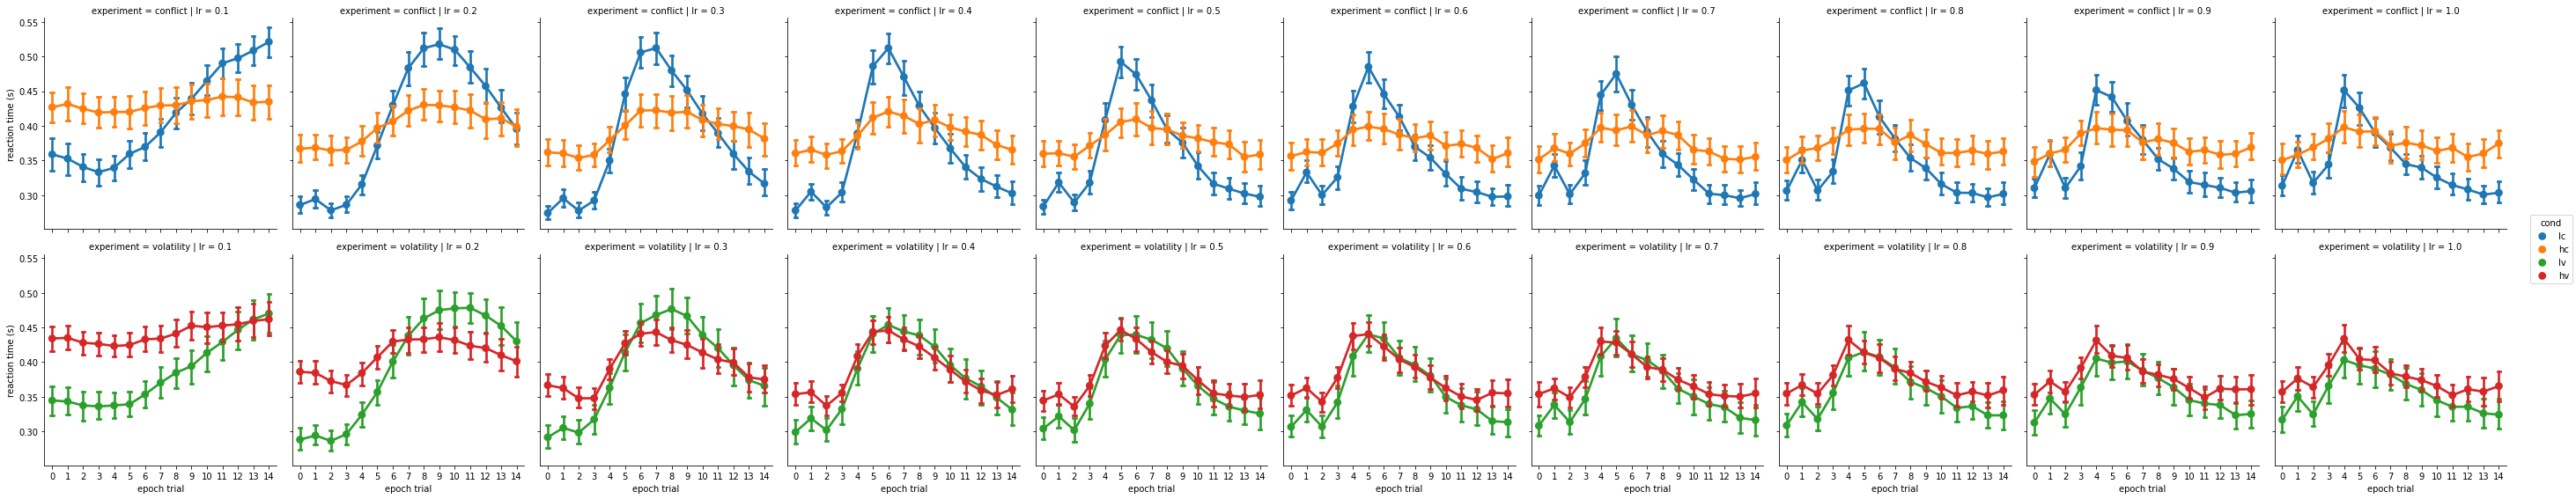

In [286]:
ax = sns.factorplot(x="epoch_trials", y="rt", hue="cond", col="lr", row='experiment', data=epoch_df, capsize=.2, units="ID")
ax.set_ylabels('reaction time (s)')
ax.set_xlabels('epoch trial')

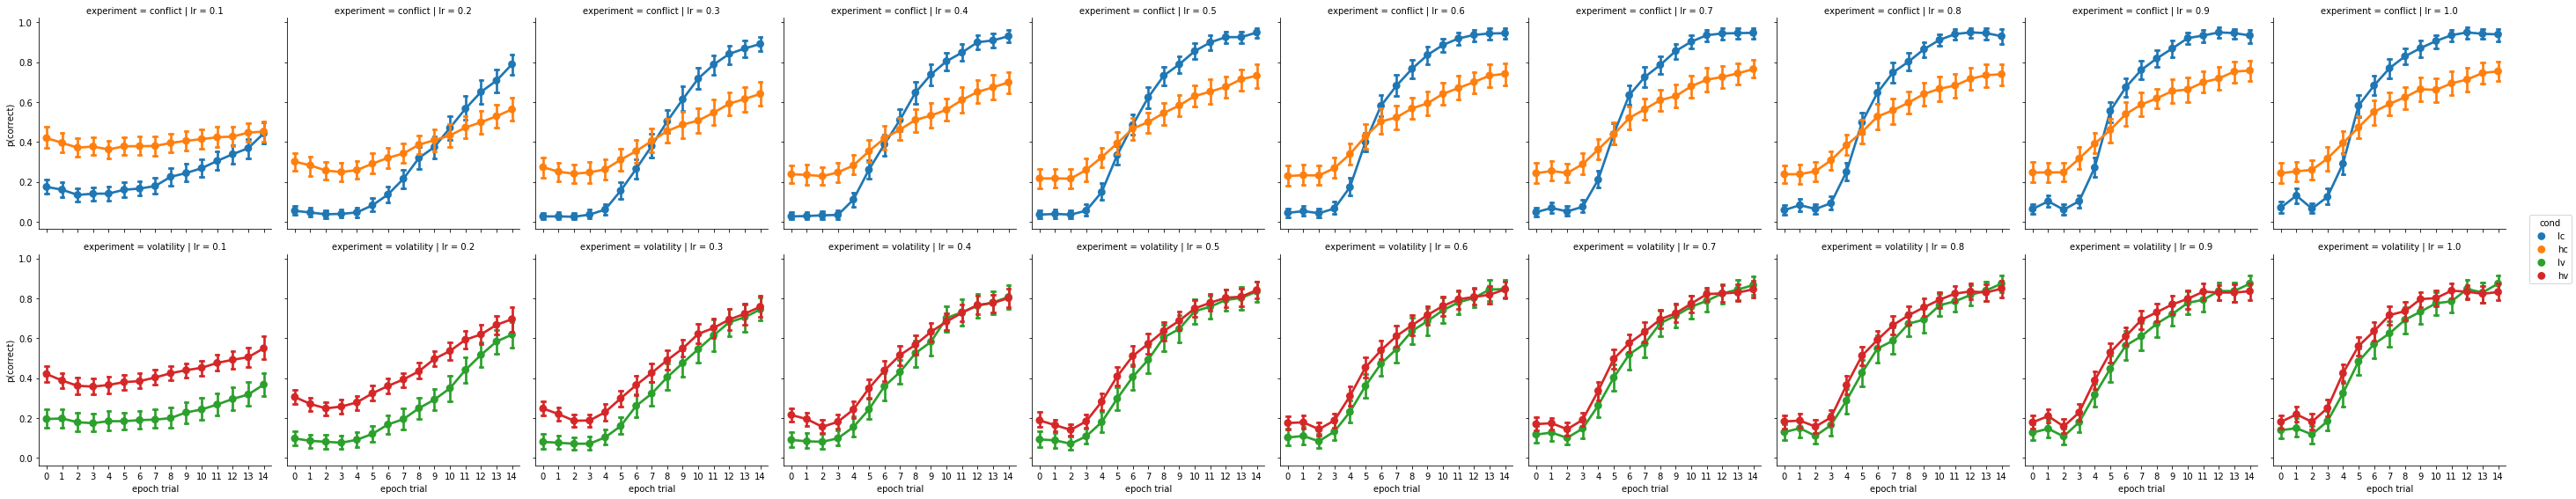

In [287]:
ax = sns.factorplot(x="epoch_trials", y="acc", hue="cond", col="lr", row="experiment", data=epoch_df, capsize=.2, units="ID")
ax.set_ylabels('p(correct)')
ax.set_xlabels('epoch trial')

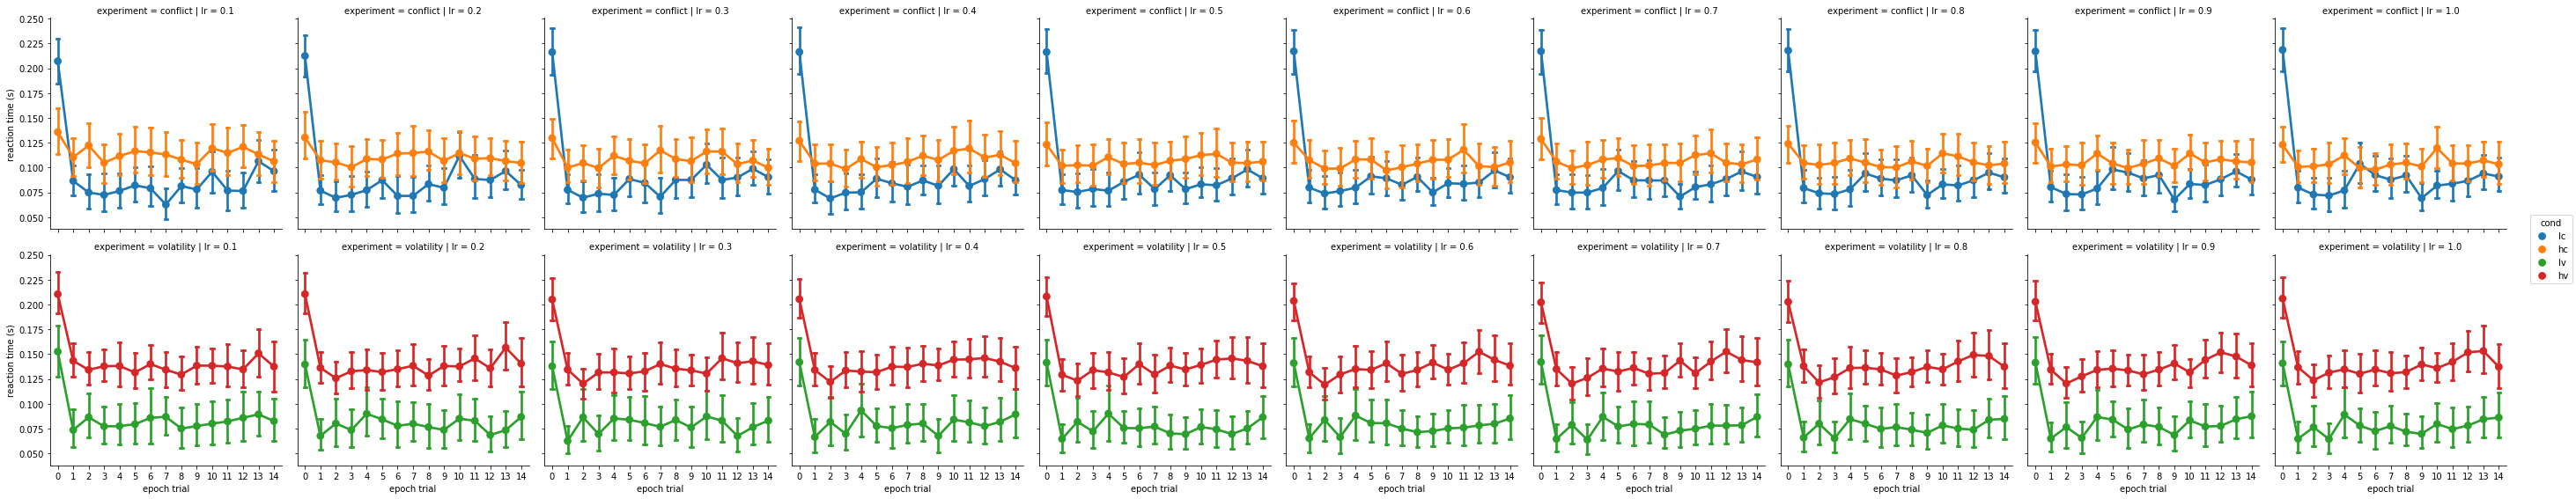

In [327]:
ax = sns.factorplot(x="epoch_trials", y="cpp", hue="cond", col="lr", row='experiment', data=epoch_df, capsize=.2, units="ID")
ax.set_ylabels('cpp')
ax.set_xlabels('epoch trial')

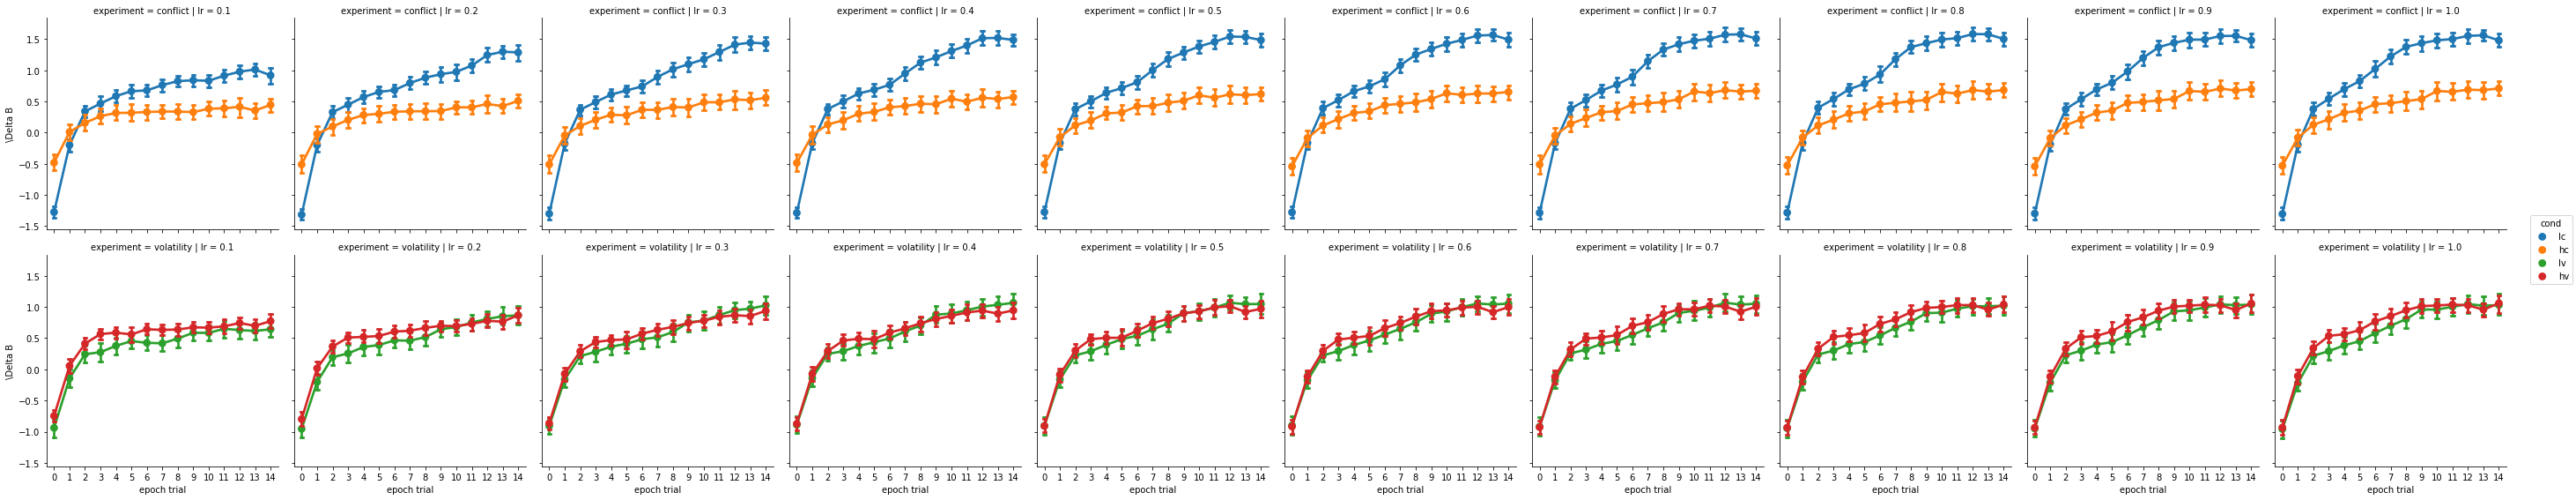

In [328]:
ax = sns.factorplot(x="epoch_trials", y="ideal_B", hue="cond", col="lr", row='experiment', data=epoch_df, capsize=.2, units="ID")
ax.set_ylabels(r'\Delta B')
ax.set_xlabels('epoch trial')